=================================================

Milestone 1

Nama  : Pujo Prasetyo Aji

Batch : RMT-043

Project ini berisi rangkaian proses analisis data beserta visualisasi data penjualan mobil.
Proses analisis data dilakukan untuk mengetahui preferensi konsumen terhadap penjualan mobil sebagai bahan pertimbangan strategi bisnis perusahaan.


=================================================


# Interactive Dashboard Tableau

Main Dashboard:
https://public.tableau.com/app/profile/pujo.prasetyo.aji/viz/Book1_17454778947720/AnalisisPenjualanMobil?publish=yes

Dashboard Statistik Deskriptif
https://public.tableau.com/app/profile/pujo.prasetyo.aji/viz/Book1_17454778947720/Statistik?publish=yes

Dashboard Statistik Inferensial
https://public.tableau.com/app/profile/pujo.prasetyo.aji/viz/Book1_17454778947720/Inferensial?publish=yes

# I. Problem Statement and Dataset Description

 1a. Topik permasalahan : Preferensi konsumen terhadap jenis mobil

 1b. Latar belakang
 
 Seorang klien yang merupakan pemilik showrom mobil menghubungi saya untuk meminta pendapat mengenai penjualan mobil di perusahaannya. Jumlah transaksi yang dilakukan oleh perusahaannya mengalami stagnansi dan cenderung mengalami penurunan. Dia merasa perlu melakukan strategi baru untuk meningkatkan jumlah penjualan.Sebagai seorang data analis saya mencari data penjualan mobil dalam beberapa tahun terakhir, kemudian melakukan analisis statistik pada data tersebut dan menggambarkan visualisasi data agar mudah dipahami oleh klien.

 User/Client : Owner Showrom Mobil


 1c. Sumber dataset

Dataset yang digunakan merupakan data penjualan mobil berasal dari web kaggle dengan judul "Vehicle Sales Data".

url = "https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data"

 1d. Problem Statement

 Definisi permasalahan lebih jelas dapat dilihat pada matrix SMART berikut:

- S = Meningkatkan jumlah penjualan mobil dan meningkatkan jumlah pelanggan perusahaan (leads)
- M = Meningkatkan total pendapatan perusahaan (Net Profit Value) sebesar 20% dan customer leads sebesar 5%
- A = Memfokuskan penjualan mobil yang memiliki jumlah peminat yang tinggi untuk meningkatkan profit, memberikan promo service untuk setiap transaksi mobil
- R = Pertumbuhan jumlah pendapatan dan basis pelanggan dapat mendukung pertumbuhan perusahaan untuk melakukan ekspansi pasar otomotif dengan menjual produk-produk unggulan dan transaksi keuangan yang stabil.
- T = Dicapai dalam periode Quartal 3 (Juli – September 2025).

> "Meningkatkan jumlah pendapatan perusahaan sebesar 20% dan costomer leads sebesar 5% dengan cara memfokuskan penjualan terhadap mobil yang paling diminati dan aftersales yang menarik dalam kurun waktu 3 bulan pada Quartal 3."

1e. Penjabaran Masalah

Berdasarkan problem statement yang telah didefinisikan, statement tersebut dijabarkan kembali menjadi beberapa pertanyaan dengan metode 5W+1H:

+ What : Apa saja jenis mobil yang paling diminati konsumen? (1)
+ Who : Siapa produsen / manufacturer mobil yang paling banyak diminati? (2)
+ Where : Kota mana yang memiliki jumlah penjualan mobil paling banyak? (3)
+ When : Apakah ada perbedaan jumlah transaksi mobil pada bulan-bulan tertentu? (4)
+ How : Bagaimana kondisi mobil yang banyak diminati oleh konsumen? (5)
+ How : Bagaimana kondisi penjualan mobil saat ini? (6)
+ Why : Apakah ada pengaruh antara jarak tempuh (odometer) dengan kondisi mobil? (7)
+ Why : Apakah ada hubungan antara kondisi mobil dengan harga penjualan? (8)

# II. Data Loading

In [1]:
#Import library yang dibutuhkan
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Mengimport dataset dari car_prices.csv
df = pd.read_csv("car_prices.csv")
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


# III. Data Cleaning

Berdasarkan penjabaran masalah yang sudah diidentifikasi sebelumnya maka dataset yang digunakan akan memuat beberapa kolom data, yaitu:

1. Production_Year : Tahun produksi dari sebuah mobil
2. Manufacturer : Nama produsen mobil
3. Model : Nama model mobil
4. Type : Jenis body dari mobil
5. Color : Warna mobil
6. State : Asal / Wilayah mobil
7. Condition : Kondisi mobil
8. Odometer : Jarak yang sudah ditempuh mobil (km)
9. Seller : perusahaan penjual mobil
10. Sale_Date : Tanggal transaksi
11. Sale_Price : Harga jual mobil

In [4]:
#Membuat dataframe baru dengan nama car_sales yang berisi kolom yang sudah di tentukan diatas

car_sales = df.iloc[:, [0,1,2,4,10, 7, 8, 9, 12, 15,14]]
car_sales

,year,make,model,body,color,state,condition,odometer,seller,saledate,sellingprice
0,2015,Kia,Sorento,SUV,white,ca,5.0,16639.0,kia motors america inc,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),21500.0
1,2015,Kia,Sorento,SUV,white,ca,5.0,9393.0,kia motors america inc,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),21500.0
2,2014,BMW,3 Series,Sedan,gray,ca,45.0,1331.0,financial services remarketing (lease),Thu Jan 15 2015 04:30:00 GMT-0800 (PST),30000.0
3,2015,Volvo,S60,Sedan,white,ca,41.0,14282.0,volvo na rep/world omni,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),27750.0
4,2014,BMW,6 Series Gran Coupe,Sedan,gray,ca,43.0,2641.0,financial services remarketing (lease),Thu Dec 18 2014 12:30:00 GMT-0800 (PST),67000.0
...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Sedan,silver,in,45.0,18255.0,avis corporation,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT),33000.0
558833,2012,Ram,2500,Crew Cab,white,wa,5.0,54393.0,i -5 uhlmann rv,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),30800.0
558834,2012,BMW,X5,SUV,black,ca,48.0,50561.0,financial services remarketing (lease),Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),34000.0
558835,2015,Nissan,Altima,sedan,white,ga,38.0,16658.0,enterprise vehicle exchange / tra / rental / t...,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),11100.0


In [5]:
#Mengganti nama kolom agar sesuai dengan tabel yang sudah ditentukan
car_sales.columns = ['production_year', 'manufacturer', 'model', 'type', 'color', 'state', 'condition', 'odometer', 'seller', 'sale_date', 'sale_price']

Mengganti tipe kolom sale_date menjadi date format

In [7]:
car_sales['sale_date'] = pd.to_datetime(car_sales['sale_date'], errors='coerce', utc=False)

C:\Users\KAISAR\AppData\Local\Temp\ipykernel_8952\1579706760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_sales['sale_date'] = pd.to_datetime(car_sales['sale_date'], errors='coerce', utc=False)


In [8]:
#Menghapus semua data dengan mising value menggunakan dropna
car_sales = car_sales.dropna()

Menghapus beberapa baris data berdasarkan 'state' atau daerah penjualan. \
Penghapusan ini dikarenakan terlalu banyak kategori state yang ada dalam data namun hanya berisi sedikit value.\
Sehingga data yang digunakan diambil dari 5 state yang memiliki jumlah data terbanyak.

In [9]:
#Menghitung jumlah penjualan terbanyak berdasarkan state
car_sales['state'].value_counts().head()

state
fl    53889
ca    53056
pa    34495
tx    30263
ga    23105
Name: count, dtype: int64

In [10]:
#menggunakan metode drop() untuk menghapus data yang memiliki nilai selain yang diinginkan
car_sales.drop(car_sales[~car_sales['state'].isin(['fl','ca', 'pa','tx', 'ga'])].index, inplace=True)


C:\Users\KAISAR\AppData\Local\Temp\ipykernel_8952\3084747460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_sales.drop(car_sales[~car_sales['state'].isin(['fl','ca', 'pa','tx', 'ga'])].index, inplace=True)


In [11]:
#Mengganti inisial state dengan nama daerah agar lebih mudah dipahami
car_sales.loc[car_sales['state'] =='ca', 'state'] = 'California'
car_sales.loc[car_sales['state'] =='fl', 'state'] = 'Florida'
car_sales.loc[car_sales['state'] =='pa', 'state'] = 'Pennsylvania'
car_sales.loc[car_sales['state'] =='tx', 'state'] = 'Texas'
car_sales.loc[car_sales['state'] =='ga', 'state'] = 'Georgia'

Menambah kolom condition_cat yang mendefinisikan kondisi mobil berdasarkan kolom condition agar mudah dipahami. \
Kategori kondisi mobil dibagi menjadi 3 kategori dengan menggunakan fungsi qcut

In [12]:
# Bagi data menjadi 3 kategori (tertile)
car_sales['condition_cat'], bins = pd.qcut(car_sales['condition'], q=3, labels=['Critical', 'Need Repair', 'Good'], retbins=True)

print("Batas nilai tiap kategori:", bins)

Batas nilai tiap kategori: [ 1. 27. 38. 49.]


C:\Users\KAISAR\AppData\Local\Temp\ipykernel_8952\876417725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_sales['condition_cat'], bins = pd.qcut(car_sales['condition'], q=3, labels=['Critical', 'Need Repair', 'Good'], retbins=True)


Merapikan index data dan label kolom agar lebih rapi dan presentatif

In [13]:
#Re-arrange kolom agar keliatan lebih rapi

car_sales = car_sales[['production_year', 'manufacturer', 'model', 'type', 'color', 'state', 'condition','condition_cat', 'odometer', 'seller', 'sale_date', 'sale_price']]
car_sales.reset_index(drop=True, inplace=True)

In [14]:
car_sales

,production_year,manufacturer,model,type,color,state,condition,condition_cat,odometer,seller,sale_date,sale_price
0,2015,Kia,Sorento,SUV,white,California,5.0,Critical,16639.0,kia motors america inc,2014-12-16 12:30:00+08:00,21500.0
1,2015,Kia,Sorento,SUV,white,California,5.0,Critical,9393.0,kia motors america inc,2014-12-16 12:30:00+08:00,21500.0
2,2014,BMW,3 Series,Sedan,gray,California,45.0,Good,1331.0,financial services remarketing (lease),2015-01-15 04:30:00+08:00,30000.0
3,2015,Volvo,S60,Sedan,white,California,41.0,Good,14282.0,volvo na rep/world omni,2015-01-29 04:30:00+08:00,27750.0
4,2014,BMW,6 Series Gran Coupe,Sedan,gray,California,43.0,Good,2641.0,financial services remarketing (lease),2014-12-18 12:30:00+08:00,67000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
194803,2012,BMW,X6,SUV,silver,Pennsylvania,47.0,Good,47032.0,adcock brothers inc,2015-03-06 01:00:00+08:00,37500.0
194804,2007,Toyota,Prius,Hatchback,silver,California,38.0,Need Repair,225849.0,wwra,2015-03-06 07:00:00+08:00,4000.0
194805,2004,Hyundai,Santa Fe,SUV,blue,California,19.0,Critical,161496.0,beach city auto sales & leasing,2015-03-06 07:00:00+08:00,1500.0
194806,2001,Lincoln,Navigator,SUV,gray,California,24.0,Critical,168356.0,ideal motors,2015-03-06 07:00:00+08:00,1000.0


In [39]:
#Menyimpan hasil pengolahan data ke dalam file csv
car_sales.to_csv('dataset.csv')

# IV. Data Analysis

### Analisis Data berdasarkan statistik

#### 1. Jenis mobil yang paling laku dipasaran?

In [15]:
#Menghitung jumlah penjualan berdasarkan model mobil
sale_model = car_sales['model'].value_counts().reset_index()
sale_model.columns = ['model', 'jumlah_terjual']
print(sale_model.head())

    model  jumlah_terjual
0  Altima            7864
1   F-150            4330
2   Camry            4290
3  Accord            3728
4  Fusion            3476


C:\Users\KAISAR\AppData\Local\Temp\ipykernel_3176\1082026724.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sale_model.head(), x='jumlah_terjual', y='model', palette='bright')


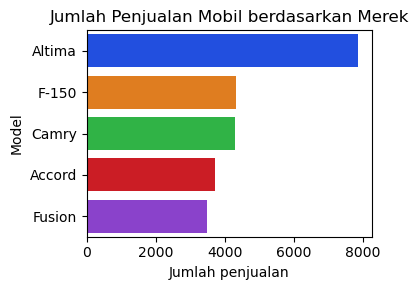

In [16]:
#Membuat visualisasi data menggunakan seaborn
plt.figure(figsize=(4, 3))
sns.barplot(data=sale_model.head(), x='jumlah_terjual', y='model', palette='bright')
plt.xlabel('Jumlah penjualan')
plt.ylabel('Model')
plt.title('Jumlah Penjualan Mobil berdasarkan Merek')
plt.tight_layout()
plt.show()

Berdasarkan data penjualan mobil di atas, merk mobil Altima merupakan mobil dengan penjualan tertinggi dengan total penjualan hampir mencapai 8000 unit. Jumlah ini cukup signifikan jika dibandingkan dengan mobil merk lain yang hanya mencapai total penjualan setengah dari jumlah tersebut. Hal ini menunjukkan bahwa peminat mobil altima jauh lebih besar dari pada merk mobil lain. 

Pada urutan kedua terdapat model F-150 dengan total penjualan sebanyak 4330 unit, disusul dengan Camry sebanyak 4290 unit.

#### 2. Produsen mobil yang paling banyak diminati

In [16]:
#Menghitung jumlah penjualan mobil berdasarkan produsen mobil
produsen = car_sales['manufacturer'].value_counts().reset_index()
produsen.columns = ['produsen', 'jumlah_penjualan']
print(produsen.head())

    produsen  jumlah_penjualan
0       Ford             28539
1  Chevrolet             19879
2     Nissan             19626
3     Toyota             14528
4      Honda             11444


C:\Users\KAISAR\AppData\Local\Temp\ipykernel_3176\1012375111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=produsen.head(), x='jumlah_penjualan', y='produsen', palette='bright')


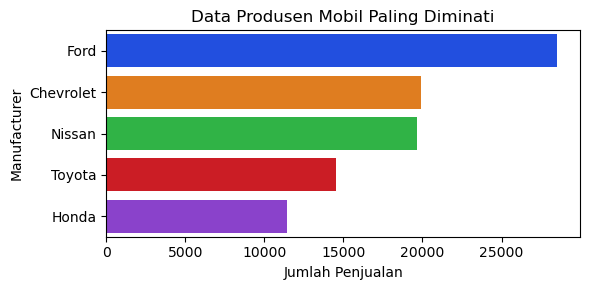

In [18]:
#Membuat visualisasi data menggunakan seaborn
plt.figure(figsize=(6, 3))
sns.barplot(data=produsen.head(), x='jumlah_penjualan', y='produsen', palette='bright')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Manufacturer')
plt.title('Data Produsen Mobil Paling Diminati')
plt.tight_layout()
plt.show()

Berdasarkan data penjulan mobil diatas, jenis mobil yang paling banyak diminati konsumen merupakan mobil yang diproduksi oleh perusahaan Ford.\
Mobil produksi perusahaan Ford terjual sebanyak 28.539 unit, jumlah tersebut sangat banyak jika dibandingkan produsen mobil lain dengan perbedaan jumlah penjualan hampir 10.000 unit. Hal ini menggambarkan bahwa konsumen sangat menyukai jenis mobil produksi perusahaan Ford.

Pada urutan kedua produsen yang disukai konsumen adalah chevrolet. Terdapat 19.879 unit mobil produksi Chevrolet yang berhasil terjual.\
Kemudian diurutan ketiga terdapat perusahaan Nissan dengan total penjulan 19.626 unit.

#### 3. Jumlah transaksi mobil berdasarkan tanggal penjualan

In [19]:
#Menghitung penjualan berdasarkan tanggal/date
date_count = (car_sales['sale_date'].dt.date).value_counts().reset_index()
date_count.columns = ['date', 'jumlah_penjualan']
print(date_count)

          date  jumlah_penjualan
0   2015-02-04              7268
1   2015-02-10              6676
2   2015-02-17              6546
3   2015-01-27              6453
4   2015-02-18              6383
..         ...               ...
60  2014-01-06                16
61  2015-02-07                 6
62  2014-01-08                 6
63  2014-02-14                 1
64  2014-01-13                 1

[65 rows x 2 columns]


C:\Users\KAISAR\AppData\Local\Temp\ipykernel_3176\1231285460.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=date_count, x='date', y='jumlah_penjualan', palette='bright')


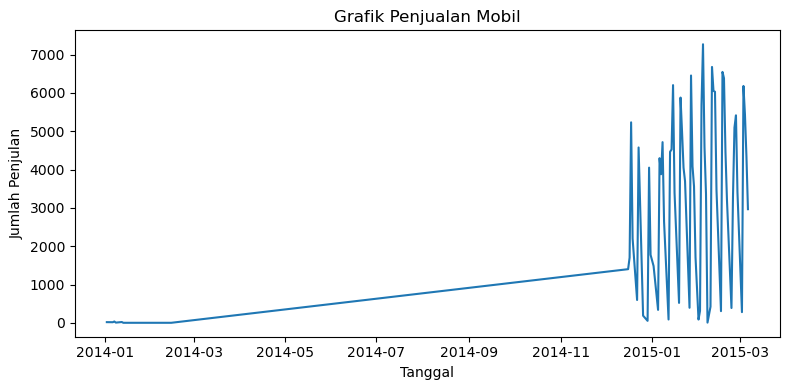

In [20]:
#Memvisualisasikan tanggal penjualan menggunakan seaborn
plt.figure(figsize=(8, 4))
sns.lineplot(data=date_count, x='date', y='jumlah_penjualan', palette='bright')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penjulan')
plt.title('Grafik Penjualan Mobil')
plt.tight_layout()
plt.show()

Berdasarkan grafik penjualan mobil diatas dapat dilihat bahwa data tersebut berasal dari kurun waktu Januari 2014 hingga Maret 2015.\
Grafik penjulan mobil berdasarkan tanggal penjualan mengalami fluktuasi yang cukup tajam.\
Selain itu terdapat stagnansi jumlah penjualan sekitar bulan maret 2014 hingga akhir tahun 2014, hal ini kemungkinan terjadi karena tidak ada data yang diambil pada bulan-bulan tersebut.\
Asumsi tersebut dapat dibuktikan dengan menampilkan data antara maret 2014 hingga desember 2014

In [21]:
saledate = car_sales[(car_sales['sale_date']>'2014-3-1') & (car_sales['sale_date']<'2014-12-1')]
saledate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype                                 
---  ------           --------------  -----                                 
 0   production_year  0 non-null      int64                                 
 1   manufacturer     0 non-null      object                                
 2   model            0 non-null      object                                
 3   type             0 non-null      object                                
 4   color            0 non-null      object                                
 5   state            0 non-null      object                                
 6   condition        0 non-null      float64                               
 7   condition_cat    0 non-null      category                              
 8   odometer         0 non-null      float64                               
 9   seller           0 non-null      object                     

Dapat dilihat bahwa tidak terdapat data penjulan sekitar maret 2014 hingga desember 2014.\
Sehingga untuk melihat statistik penjualan berdasarkan tanggal penjualan, data yang digunakan hanya data pada tahun 2015

In [22]:
#Menghitung penjualan berdasarkan tanggal/date
year15 = car_sales[car_sales['sale_date'] > '2015-01-01']
date_count2 = year15['sale_date'].dt.date.value_counts().reset_index()
date_count2.columns = ['date', 'jumlah_penjualan']
print(date_count2)

          date  jumlah_penjualan
0   2015-02-04              7268
1   2015-02-10              6676
2   2015-02-17              6546
3   2015-01-27              6453
4   2015-02-18              6383
5   2015-01-15              6202
6   2015-03-03              6180
7   2015-02-11              6052
8   2015-02-12              6028
9   2015-01-20              5877
10  2015-02-03              5688
11  2015-03-04              5438
12  2015-02-26              5414
13  2015-02-25              5093
14  2015-01-21              4985
15  2015-01-08              4714
16  2015-02-05              4582
17  2015-01-14              4523
18  2015-01-13              4461
19  2015-02-19              4456
20  2015-03-05              4337
21  2015-01-06              4296
22  2015-01-28              4081
23  2015-01-22              4048
24  2015-01-07              3877
25  2015-01-23              3697
26  2015-01-29              3561
27  2015-02-13              3466
28  2015-02-27              3410
29  2015-0

C:\Users\KAISAR\AppData\Local\Temp\ipykernel_3176\65926397.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=date_count2, x='date', y='jumlah_penjualan', palette='bright')


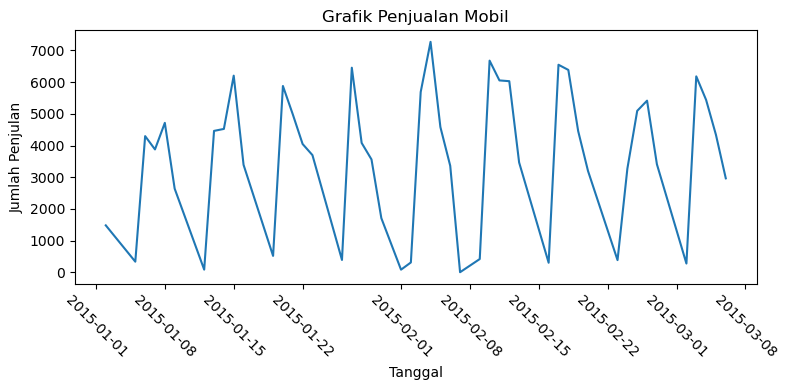

In [23]:
#Memvisualisasikan tanggal penjualan menggunakan seaborn
plt.figure(figsize=(8, 4))
sns.lineplot(data=date_count2, x='date', y='jumlah_penjualan', palette='bright')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penjulan')
plt.xticks(rotation=-45)
plt.title('Grafik Penjualan Mobil')
plt.tight_layout()
plt.show()

Jika dilihat dari jumlah penjualan mobil pada tahun 2015. Grafik penjulan mengalami fluktuasi setiap waktu. Hal ini menunjukkan bahwa tidak ada pertumbuhan atau penurunan penjualan secara konsisten dalam jangka waktu tersebut.

#### 4. Kota mana yang memiliki jumlah penjualan mobil paling banyak? 

In [24]:
#Menghitung jumlah penjualan berdasarkan state/kota
kota = car_sales['state'].value_counts().reset_index()
kota.columns = ['state', 'jumlah_penjualan']
print(kota)

          state  jumlah_penjualan
0       Florida             53889
1    California             53056
2  Pennsylvania             34495
3         Texas             30263
4       Georgia             23105


C:\Users\KAISAR\AppData\Local\Temp\ipykernel_3176\3143955166.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=kota, x='jumlah_penjualan', y='state', palette='bright')


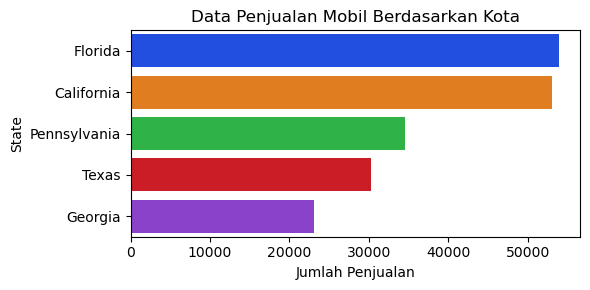

In [25]:
#Menampilkan data penjualan berdasarkan state
plt.figure(figsize=(6, 3))
sns.barplot(data=kota, x='jumlah_penjualan', y='state', palette='bright')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('State')
plt.title('Data Penjualan Mobil Berdasarkan Kota')
plt.tight_layout()
plt.show()

Dari data penjualan mobil diatas, Florida merupakan kota dengan jumlah penjualan mobil paling banyak yaitu sejumlah 53.889 unit mobil.\
Namun jumlah penjualan di Florida tidak berbeda jauh dengan jumlah penjualan di kota California yang menjadi urutan kedua dengan penjualan 53.056 unit.
Kemudian kota Pennsylvania menempati urutan ketiga dengan total penjualan 34.495 unit

#### 5. Bagaimana kondisi mobil yang banyak diminati oleh konsumen?

In [26]:
#Menghitung jumlah penjualan berdasarkan state/kota
kondisi = car_sales['condition_cat'].value_counts().reset_index()
kondisi.columns = ['kondisi', 'jumlah_penjualan']
print(kondisi)

       kondisi  jumlah_penjualan
0     Critical             66070
1  Need Repair             64662
2         Good             64076


C:\Users\KAISAR\AppData\Local\Temp\ipykernel_3176\2412077283.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=kondisi, x='jumlah_penjualan', y='kondisi', palette='bright')


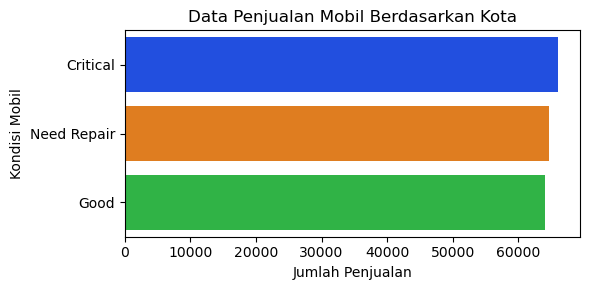

In [27]:
#Menampilkan data penjualan berdasarkan state
plt.figure(figsize=(6, 3))
sns.barplot(data=kondisi, x='jumlah_penjualan', y='kondisi', palette='bright')
plt.xlabel('Jumlah Penjualan')
plt.ylabel('Kondisi Mobil')
plt.title('Data Penjualan Mobil Berdasarkan Kota')
plt.tight_layout()
plt.show()

Berdasarkan visualisasi data penjualan mobil diatas, Mobil dengan kondisi critical merupakan mobil dengan jumlah penjualan terbanyak yaitu sejumlah 66.070 unit. Hal tersebut berarti konsumen lebih menyukai mobil dengan kondisi critical untuk nantinya diperbaiki sendiri. \
Mobil dengan kondisi cukup baik namun memerlukan perawatan memiliki total penjualan sejumlah 64.662 unit. \
Dan mobil dengan kondisi bagus merupakan mobil dengan jumlah penjualan paling rendah sejumlah 64.076 unit.

### Statistik Deskriptif

Statistik deskriptif dilakukan untuk menggambarkan kondisi atau karakteristik data secara umum. 

#### 6. Kondisi harga jual mobil berdasarkan analisis statistik deskriptif

Pada tahap ini statitik deskriptif digunakan terhadap variabel harga jual mobil untuk melihat kondisi harga mobil berdasarkan data penjualan.

##### - Central Tendencies

In [18]:
mean = car_sales['sale_price'].mean()
median = car_sales['sale_price'].median()
mode = car_sales['sale_price'].mode().values[0]

print(f"Nilai rata-rata penjualan : ${mean:.2f}, median : ${median}, dan modus : ${mode}")

Nilai rata-rata penjualan : $13964.49, median : $12500.0, dan modus : $12000.0


+ Hasil perhitungan central tendencies pada harga penjualan mobil didapatkan harga rata-rata penjualan sebesar $13.964,49 dengan nilai tengah $12.500, dan harga mobil yang paling sering keluar (modus) yaitu $12.000.0 
+ Jika dilihat dari nilai rata-rata yang lebih tinggi dari pada nilai tengah (median) dapat di asumsikan bahwa terdapat beberapa data yang memiliki nilai yang sangat tinggi sehinnga dapat menaikkan nilai rata-rata.
+ Selain itu jika dilihat dari nilai central tendencies yang tidak jauh berbeda dapat diasumsikan juga bahwa data merupakan jenis data terpusat yang sebagian besar nilai penjualan berada disekitar rata-rata

##### - Variance

In [23]:
var = car_sales['sale_price'].var()
std = car_sales['sale_price'].std()
print("Nilai varian dari harga penjualan mobil : ", var)
print("dengan standart deviasi : ", std)

Nilai varian dari harga penjualan mobil :  94317346.9114893
dengan standart deviasi :  9711.711842486333


Nilai varian yang didapatkan berdasarkan harga penjualan yaitu sebesar 94317346.9114893.\
Nilai tersebut merupakan nilai yang sangat besar, hal tersebut menunjukkan bahwa ada perbedaan nilai yang jauh antara nilai penjualan terendah dan nilai penjualan tertinggi.

Jika dilihat dari nilai standart deviasi sebesar 9711.72, harga penjualan mobil memiliki variasi nilai harga jual yang sangat beragam karena rentang harga yang cukup tinggi.

##### - Outlier Analysis

In [22]:
skew = car_sales['sale_price'].skew()
kur = car_sales['sale_price'].kurtosis()

print(f"Nilai skewness dari harga penjualan : {skew} dan kurtosis: {kur}")

Nilai skewness dari harga penjualan : 2.1114843465114976 dan kurtosis: 13.096401501574968


Nilai skewness yang didapatkan pada dataset yaitu sebesar 2.11.\
Nilai tersebut lebih dari 0 yang berarti bahwa data terpusat di sisi kiri dan condong kekanan, kemudian terdapat beberapa nilai retail yang memiliki nilai jauh lebih besar dari nilai lainnya.

Kemudian jika dilihat berdasarkan nilai kurtosis yang dihasilkan yaitu sebesar 13.096.\
Nilai tersebut lebih besar dari 0 dan tergolong sangat tinggi, hal ini membuktikan bahwa dataset memiliki banyak nilai ekstrim yang memiliki nilai jauh lebih besar dari pada nilai lainnya.

### Statistik Inferensial

##### - Normality Test

Uji normalitas dilakukan untuk melihat distribusi data, apakah data tersebut terdistribusi normal atau tidak. \
Proses ini perlu dilakukan untuk menentukan metode yang tepat untuk proses uji asumsi yang akan dilakukan selanjutnya.
Dikarenakan dataset yang digunakan merupakan data dengan sampel besar lebih dari 100.000 data, maka metode uji normalitas yang digunakan adalah D’Agostino and Pearson’s Test. \
Normality test dilakukan terhadap 3 kolom yang akan dianalisis yaitu kolom condition, odometer, dan sale_price

In [17]:
res1 = stats.normaltest(car_sales['condition'])
res2 = stats.normaltest(car_sales['odometer'])
res3 = stats.normaltest(car_sales['sale_price'])
print(f'p-value kolom condition: {res1.pvalue}')
print(f'p-value kolom odometer: {res2.pvalue}')
print(f'p-value kolom sale_price: {res3.pvalue}')

p-value kolom condition: 0.0
p-value kolom odometer: 0.0
p-value kolom sale_price: 0.0


Dari hasil pengujian D’Agostino and Pearson’s Test nilai p-value yang didapatkan dari ketiga kolom tersebut yaitu 0.0 yang berarti data tersebut merupakan data yang terdistribusi tidak normal, sehingga pengujian asumsi dilakukan menggunakan metode non-parametrix.

##### 7. Korelasi / Hubungan antara jarak tempuh (odometer) dengan kondisi mobil?

Pada tahapan ini dilakukan uji korelasi untuk mencari tahu hubungan antara jarak tempuh (odometer) dengan kondisi mobil (condition).\
Metode yang digunakan untuk melakukan pengujian yaitu metode non-parametrix Spearman test.\
Asumsi yang digunakan untuk pengujian ini yaitu:

+ H0 : Tidak terdapat hubungan yang signifikan antara jarak tempuh mobil dengan kondisi mobil
+ H1 : Terdapat hubungan yang signifikan antara jarak tempuh mobil dengan kondisi mobil



In [19]:
# Hitung korelasi Spearman
rho, p_value = stats.spearmanr(car_sales['condition'], car_sales['odometer'])

# Tampilkan hasil
print(f"Spearman correlation (rho): {rho:.3f}")
print(f"P-value: {p_value:.3f}")


Spearman correlation (rho): -0.386
P-value: 0.000


Nilai p-value yang didapatkan dari pengujian spearman adalah 0.0 \
Nilai tersebut menunjukkan nilai yang cukup ekstrim yang berarti bahwa nilai p-value sangatlah kecil.\
Hal tersebut menunjukkan bukti yang sangat kuat bahwa data menolak H0.


Sehingga dapat disimpulkan bahwa H0 ditolak dan H1 diterima.
> Terdapat hubungan yang signifikan antara jarak tempuh mobil dengan kondisi mobil

Nilai corelation (rho) pada data tersebut didapatkan nilai -0.386, nilai ini menunjukkan teredapat korelasi negatif antara dua variabel
Artinya: saat nilai satu variabel naik, variabel lainnya cenderung ikut turun, dalam dataset ini hal tersebut berarti misal nilai odometer naik maka nilai condition mobil akan turun.

##### 8. Korelasi / Hubungan antara kondisi mobil dengan harga penjualan? 

Tahap ini uji korelasi dilakukan untuk mencari tahu adakah hubungan antara kondisi mobil dengan harga penjualan.\
Metode yang digunakan untuk melakukan pengujian yaitu metode non-parametrix Spearman test.\
Asumsi yang digunakan untuk pengujian ini yaitu:

+ H0 : Tidak terdapat hubungan yang signifikan antara jarak tempuh mobil dengan harga penjualan
+ H1 : Terdapat hubungan yang signifikan antara jarak tempuh mobil dengan harga penjualan

In [21]:
# Hitung korelasi Spearman
rho, p_value = stats.spearmanr(car_sales['condition'], car_sales['sale_price'])

# Tampilkan hasil
print(f"Spearman correlation (rho): {rho:.3f}")
print(f"P-value: {p_value:.3f}")


Spearman correlation (rho): 0.471
P-value: 0.000


Berdasarkan pengujian spearman p-value yang muncul adalah 0.0\
Nilai tersebut kurang dari nilai signifikansi p-value < 0.05 \


Sehingga dapat disimpulkan bahwa H0 ditolak dan H1 diterima.
> Terdapat hubungan yang signifikan antara kondisi mobil dengan harga penjualan

Nilai corelation (rho) pada data tersebut didapatkan nilai 0.471, nilai ini menunjukkan teredapat korelasi positif antara dua variabel
Artinya: saat nilai satu variabel naik, variabel lainnya juga cenderung ikut naik, dalam dataset ini hal tersebut berarti misal nilai kondisi mobil naik atau bagus maka nilai jual akan menjadi lebih tinggi

# V. Conclusion

Kesimpulan berisi penjelasan mengenai seluruh tahapan analisis yang telah dilalui dan juga jawaban dari problem statement. 

Terdapat beberapa kesimpulan yang dapat diambil dari penelitian ini antara lain:

1. Berdasarkan hasil analisis jumlah penjualan mobil terhadap model mobil, dapat disimpulkan Altima merupakan mobil yang paling banyak diminati, selain mobil tersebut mobil F-150 dan Camry juga sangat diminati di pasaran.

2. Perusahaan Mobil Ford merupakan perusahaan mobil yang memiliki jumlah unit terjual paling banyak. Perusahaan ini telah menjual lebih dari 28.000 unit mobil, jumlah tersebut dua kali lebih banyak dari pada jumlah penjualan di beberapa perusahaan lainnya.

3. Berdasarkan hasil grafik penjualan mobil yang diambil pada tahun 2014-2015, tidak terdapat perbedaan penjualan mobil di bulan-bulan tertentu, data penjualan mobil bahkan memiliki fluktuasi data yang tinggi, hal tersebut menandakan bahwa terjadi kenaikan atau penurunan jumlah penjualan setiap saat.

4. Kota Florida merupakan kota dengan jumlah penjualan mobil paling banyak saat ini, namun jumlah tersebut tidak terpaut jauh dengan jumlah penjualan di kota California. Kedua kota tersebut bisa dibilang hampir sejajar dalam hal jumlah penjualan dan merupakan kota dengan transaksi mobil terbanyak.

5. Berdasarkan hasil visualisasi data terhadap kondisi mobil, mobil yang paling banyak diminati oleh konsumen adalah mobil dengan kondisi critical dengan jumlah unit terjual sebanyak 66.070 unit. Hal ini dapat diasumsikan bahwa konsumen lebih tertarik dengan mobil dengan kondisi buruk agar mendapatkan harga yang relatif rendah.

6. Berdasarkan hasil analisis statistik deskriptif mengenai harga penjualan mobil. Harga jual mobil bisa dibilang sangat beragam. Terdapat beberapa mobil yang memiliki nilai jual rendah namun ada juga mobil yang sangat mahal. Untuk nilai rata-rata penjulan mobil berada di angka $13.964

7. Jarak tempuh yang telah dilalui mobil (odometer) sangat berpengaruh terhadap kondisi mobil, sehingga sebelum melakukan pembelian lebih baik konsumen mengecek odometer untuk sebelum melihat kondisi mobil secara keseluruhan.

8. Kondisi mobil juga sangat berpengaruh terhadap distribusi penjualan. Dalam dataset penjualan yang digunakan data mobil yang ada memiliki berbagai kondisi mulai dari kondisi baik hingga critical, sehingga hal tersebut turut mempengaruhi harga jual mobil yang sangat variatif.

Berdasarkan seluruh hasil proses analasis yang ada dapat disimpulkan bahwa penjualan mobil saat ini terpantau cukup baik. Untuk meningkatkan jumlah penjualan, perusahaan sebaiknya memperbanyak stok mobil altima produksi dari perusahaan nissan dan F-150 produk dari perusahaan Ford, karena mobil tersebut merupakan mobil yang paling banyak peminatnya dipasaran. Selain itu berdasarkan data penjualan konsumen lebih tertarik untuk membeli mobil dengan kondisi rusak agar mendapatkan harga lebih murah, hal tersebut dapat memunculkan potensi bisnis baru yaitu dengan cara memberikan diskon perbaikan atau pembelian sparepart. Perusahaan juga bisa menawarkan loyalty member agar konsumen dapat mendapatkan biaya perbaikan lebih murah.